In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import ravel
from numpy import transpose
import sklearn
import seaborn
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Read data

In [103]:

url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTNHzE8ZtqEuBAwdPjA139TpkAMvYW4O9IYT-0o90yJT8RXSvpQJCybBfAJQ8ecDOFPoR-PCtSC5PZF/pub?gid=1805190093&single=true&output=csv"
colmns = ["name", "date", "imp_trade_value_usd", "exp_trade_value_usd", "freq_sum", "t"]
data = pd.read_csv(url, usecols = colmns)
unique_items = data.loc[:, "name"].unique()

In [3]:
data.head()

,name,date,imp_trade_value_usd,exp_trade_value_usd,freq_sum,t
0,Пальмовое масло,1990,814427705,1697427073,15,1
1,Пальмовое масло,1991,1070156794,2064191280,5,2
2,Пальмовое масло,1992,1710601266,2446682062,18,3
3,Пальмовое масло,1993,1934545377,2751329740,17,4
4,Пальмовое масло,1994,3150844170,4183140161,32,5


In [104]:
data['exp_imp_sum'] = data['imp_trade_value_usd'] + data['exp_trade_value_usd']

In [375]:
data.to_csv("Comtrade_with_sum.csv")

In [105]:
data['freq_sum'].describe()

count       754.000000
mean      16099.823607
std       71789.868626
min           1.000000
25%         503.750000
50%        2367.500000
75%        8290.750000
max      968096.000000
Name: freq_sum, dtype: float64

In [6]:
data.describe()

,date,imp_trade_value_usd,exp_trade_value_usd,freq_sum,t,exp_imp_sum
count,754.000000,7.540000e+02,7.540000e+02,754.000000,754.000000,7.540000e+02
mean,2004.000000,4.159811e+10,3.560657e+10,16099.823607,15.000000,7.720468e+10
std,8.372154,1.730658e+11,1.468189e+11,71789.868626,8.372154,3.193134e+11
min,1990.000000,4.682507e+07,4.088026e+07,1.000000,1.000000,1.346124e+08
25%,1997.000000,1.620911e+09,1.374336e+09,503.750000,8.000000,3.054605e+09
50%,2004.000000,5.919344e+09,5.587855e+09,2367.500000,15.000000,1.132061e+10
75%,2011.000000,1.686988e+10,1.602089e+10,8290.750000,22.000000,3.288912e+10
max,2018.000000,1.726236e+12,1.535602e+12,968096.000000,29.000000,3.172289e+12


В целом корреляции между столбцами очень низкие. Сильно скоррелированны только экспорт и импорт

In [7]:
data.corr()

,date,imp_trade_value_usd,exp_trade_value_usd,freq_sum,t,exp_imp_sum
date,1.000000,0.158614,0.166176,0.201278,1.000000,0.162375
imp_trade_value_usd,0.158614,1.000000,0.992815,0.005688,0.158614,0.998485
exp_trade_value_usd,0.166176,0.992815,1.000000,0.011300,0.166176,0.997895
freq_sum,0.201278,0.005688,0.011300,1.000000,0.201278,0.008279
t,1.000000,0.158614,0.166176,0.201278,1.000000,0.162375
exp_imp_sum,0.162375,0.998485,0.997895,0.008279,0.162375,1.000000


In [8]:
from scipy.stats.stats import pearsonr

Значение частных коэффициентов корреляции между экспортом ($) и частотой встречаемости термина

In [9]:
list_ = []
for item_name in unique_items:
    a = data[data["name"] == item_name].exp_trade_value_usd
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
#     if pearsonr(a, b)[1] < 0.05:
#         print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим на уровне дов. вер-ти в 95%")
#     else:
#         print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим на уровне дов. вер-ти в 95%")
print(np.array(list_).mean())

Пальмовое масло : 0.884, стат. значим на уровне дов. вер-ти в 95%
Сахар : 0.841, стат. значим на уровне дов. вер-ти в 95%
Железная руда : 0.861, стат. значим на уровне дов. вер-ти в 95%
Медь : 0.939, стат. значим на уровне дов. вер-ти в 95%
Никель : 0.838, стат. значим на уровне дов. вер-ти в 95%
Алюминий : 0.852, стат. значим на уровне дов. вер-ти в 95%
Свинец : 0.839, стат. значим на уровне дов. вер-ти в 95%
Цинк : 0.855, стат. значим на уровне дов. вер-ти в 95%
Олово : 0.594, стат. значим на уровне дов. вер-ти в 95%
Сырая нефть : 0.566, стат. значим на уровне дов. вер-ти в 95%
Серебро : 0.813, стат. значим на уровне дов. вер-ти в 95%
Платина : 0.762, стат. значим на уровне дов. вер-ти в 95%
Хлористый калий : 0.855, стат. значим на уровне дов. вер-ти в 95%
Говядина : 0.937, стат. значим на уровне дов. вер-ти в 95%
Свинина : 0.899, стат. значим на уровне дов. вер-ти в 95%
Баранина : 0.883, стат. значим на уровне дов. вер-ти в 95%
Конина : 0.22, стат. НЕ значим на уровне дов. вер-ти в 

Значение частных коэффициентов корреляции между импортом ($) и частотой встречаемости термина

In [10]:
list_ = []
for item_name in unique_items:
    a = data[data["name"] == item_name].imp_trade_value_usd
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
#     if pearsonr(a, b)[1] < 0.05:
#         print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим на уровне дов. вер-ти в 95%")
#     else:
#         print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим на уровне дов. вер-ти в 95%")
print(np.array(list_).mean())

Пальмовое масло : 0.867, стат. значим на уровне дов. вер-ти в 95%
Сахар : 0.814, стат. значим на уровне дов. вер-ти в 95%
Железная руда : 0.858, стат. значим на уровне дов. вер-ти в 95%
Медь : 0.922, стат. значим на уровне дов. вер-ти в 95%
Никель : 0.794, стат. значим на уровне дов. вер-ти в 95%
Алюминий : 0.926, стат. значим на уровне дов. вер-ти в 95%
Свинец : 0.822, стат. значим на уровне дов. вер-ти в 95%
Цинк : 0.834, стат. значим на уровне дов. вер-ти в 95%
Олово : 0.737, стат. значим на уровне дов. вер-ти в 95%
Сырая нефть : 0.602, стат. значим на уровне дов. вер-ти в 95%
Серебро : 0.812, стат. значим на уровне дов. вер-ти в 95%
Платина : 0.728, стат. значим на уровне дов. вер-ти в 95%
Хлористый калий : 0.815, стат. значим на уровне дов. вер-ти в 95%
Говядина : 0.943, стат. значим на уровне дов. вер-ти в 95%
Свинина : 0.888, стат. значим на уровне дов. вер-ти в 95%
Баранина : 0.886, стат. значим на уровне дов. вер-ти в 95%
Конина : 0.186, стат. НЕ значим на уровне дов. вер-ти в

Значение частных коэффициентов корреляции между суммой ($) и частотой встречаемости термина

Корреляции 

In [11]:
list_ = []
results = []
for item_name in unique_items:

    a = data[data["name"] == item_name].exp_imp_sum
    b = data[data["name"] == item_name].freq_sum
    list_.append(pearsonr(a, b)[0])
    results.append({"Товар":item_name, "Коэффициент Пирсона":pearsonr(a, b)[0], "Значимость":pearsonr(a, b)[1]})
    if pearsonr(a, b)[1] < 0.05:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. значим на уровне дов. вер-ти в 95%")
    else:
        print(f"{item_name} : {pearsonr(a, b)[0]:.3}, стат. НЕ значим на уровне дов. вер-ти в 95%")
print("")
print(np.array(list_).mean())

Пальмовое масло : 0.876, стат. значим на уровне дов. вер-ти в 95%
Сахар : 0.829, стат. значим на уровне дов. вер-ти в 95%
Железная руда : 0.861, стат. значим на уровне дов. вер-ти в 95%
Медь : 0.931, стат. значим на уровне дов. вер-ти в 95%
Никель : 0.813, стат. значим на уровне дов. вер-ти в 95%
Алюминий : 0.919, стат. значим на уровне дов. вер-ти в 95%
Свинец : 0.831, стат. значим на уровне дов. вер-ти в 95%
Цинк : 0.844, стат. значим на уровне дов. вер-ти в 95%
Олово : 0.775, стат. значим на уровне дов. вер-ти в 95%
Сырая нефть : 0.587, стат. значим на уровне дов. вер-ти в 95%
Серебро : 0.813, стат. значим на уровне дов. вер-ти в 95%
Платина : 0.748, стат. значим на уровне дов. вер-ти в 95%
Хлористый калий : 0.837, стат. значим на уровне дов. вер-ти в 95%
Говядина : 0.941, стат. значим на уровне дов. вер-ти в 95%
Свинина : 0.894, стат. значим на уровне дов. вер-ти в 95%
Баранина : 0.886, стат. значим на уровне дов. вер-ти в 95%
Конина : 0.204, стат. НЕ значим на уровне дов. вер-ти в

In [12]:
correlations = pd.DataFrame(results)[['Товар', 'Коэффициент Пирсона', 'Значимость']]
correlations
# pd.DataFrame(results)[['Товар', 'Коэффициент Пирсона', 'Значимость']].set_index('Товар')

,Товар,Коэффициент Пирсона,Значимость
0,Пальмовое масло,0.876477,4.611030e-10
1,Сахар,0.828959,2.777974e-08
2,Железная руда,0.860679,2.123616e-09
3,Медь,0.930926,2.509709e-13
4,Никель,0.813353,8.182674e-08
5,Алюминий,0.918606,2.136513e-12
6,Свинец,0.830920,2.406965e-08
7,Цинк,0.844458,8.491871e-09
8,Олово,0.775119,7.931267e-07
9,Сырая нефть,0.587082,8.142134e-04


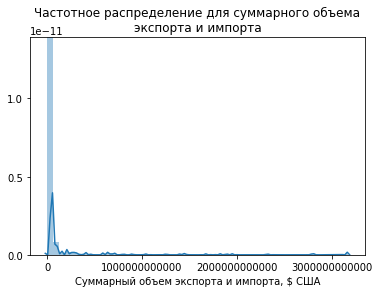

In [14]:
plt.locator_params(nbins=4)
seaborn.distplot(data.exp_imp_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для суммарного объема\nэкспорта и импорта"
plt.title(name)
plt.xlabel("Суммарный объем экспорта и импорта, $ США")
plt.ylabel("")
plt.savefig(name)
plt.show()

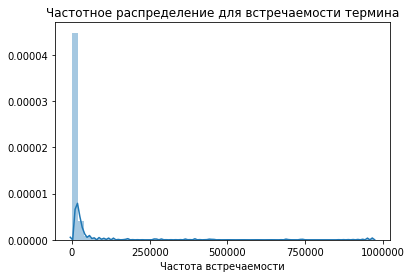

In [15]:
plt.locator_params(nbins=5)
plot = seaborn.distplot(data.freq_sum).ticklabel_format(axis = 'x',style = "plain")
name = "Частотное распределение для встречаемости термина"
plt.title(name)
plt.xlabel("Частота встречаемости")
plt.ylabel("")
# plt.show()
plt.savefig(name)

In [106]:
data['sum_volume_log10'] = np.log10(data['exp_imp_sum'])
data['freq_sum_log10'] = np.log10(data['freq_sum'])

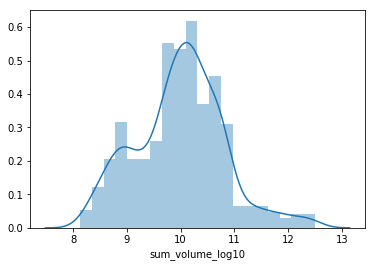

In [268]:
seaborn.distplot(data.sum_volume_log10).ticklabel_format(axis = 'x',style = "plain")

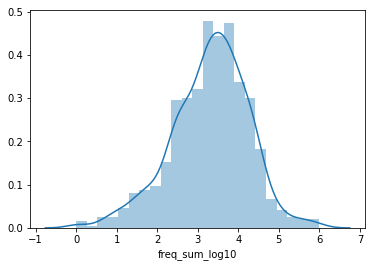

In [269]:
seaborn.distplot(data.freq_sum_log10).ticklabel_format(axis = 'x',style = "plain")

### scaler

In [107]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

### Model definition

Lin reg baseline

In [23]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [24]:
mod = sm.OLS(data.sum_volume_log10, data.freq_sum_log10)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.066e+04
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:23:06   Log-Likelihood:                -1783.1
No. Observations:                 754   AIC:                             3568.
Df Residuals:                     753   BIC:                             3573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.8213      0.027    103.

In [25]:
linear_regressor = LinearRegression(fit_intercept = True)
fitt = linear_regressor.fit(data[['freq_sum_log10']], data[['sum_volume_log10']])
Y_pred = linear_regressor.predict(data[['freq_sum_log10']])
linear_regressor.score(data[['freq_sum_log10']], data[['sum_volume_log10']])

0.1418332816069029

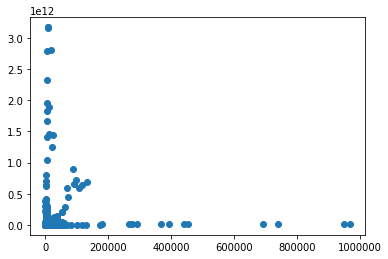

In [26]:
plt.scatter(data.freq_sum, data.exp_imp_sum)

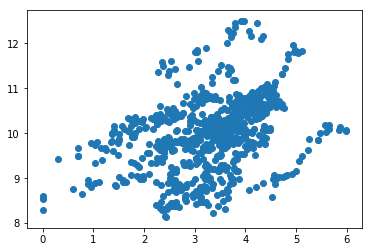

In [27]:
plt.scatter(data[['freq_sum_log10']], data[['sum_volume_log10']])

In [223]:
logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]

In [110]:
logged_data.corr()

,sum_volume_log10,freq_sum_log10,t
sum_volume_log10,1.000000,0.376608,0.396961
freq_sum_log10,0.376608,1.000000,0.569717
t,0.396961,0.569717,1.000000


Linear regression on logged10 data

In [111]:
X_log = logged_data[['freq_sum_log10']]
Y_log = logged_data['sum_volume_log10']

In [31]:
mod = sm.OLS(Y_log, X_log)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_volume_log10   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.066e+04
Date:                Sun, 29 Dec 2019   Prob (F-statistic):               0.00
Time:                        01:23:10   Log-Likelihood:                -1783.1
No. Observations:                 754   AIC:                             3568.
Df Residuals:                     753   BIC:                             3573.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
freq_sum_log10     2.8213      0.027    103.

Just try some models. Random forest is good and SVR is not really, but still it can give results later

In [113]:
model__ = RandomForestRegressor(n_estimators=200, random_state=12)
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.801047922027746

In [33]:
model__ = SVR(kernel='linear')
model__.fit(X_log, ravel(Y_log))
prediction_1 = model__.predict(X_log)
r2_score(Y_log, prediction_1)

0.13425292182178528

In [34]:
logged_data.head()

,name,sum_volume_log10,freq_sum_log10,t
0,Пальмовое масло,9.399995,1.176091,1
1,Пальмовое масло,9.496147,0.698970,2
2,Пальмовое масло,9.618810,1.255273,3
3,Пальмовое масло,9.670791,1.230449,4
4,Пальмовое масло,9.865340,1.505150,5


In [51]:
model__ = RandomForestRegressor(n_estimators=150, random_state=12)
train = logged_data.copy(deep=True)
X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
model__.fit(X_train, y_train)

for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], test.loc[:, ["sum_volume_log10"]]
    
    prediction = model__.predict(X_test)
    print(r2_score(y_test, prediction))

0.7251673176043478
0.8222541590356519
0.43943442526710075
0.8495870286546617
0.6443242798868862
0.05908820161242023
0.9321134381543154
0.7299993041077657
-2.2981859588782827
-1.6599682625355134
0.9215591818930116
0.603387099354851
0.657040822001387
0.7372175949295725
0.26235714940004684
0.5785008968295462
-1.4056798596200055
0.4416482150884288
0.482824264890544
0.9084440121742215
0.6318785006845216
-2.7541088633924553
-0.41266502483783096
0.9457356277731772
0.7185720351536056
0.8214665724765968


In [52]:
logged_data

,name,sum_volume_log10,freq_sum_log10,t
0,palm_oil,9.399995,1.176091,1
1,palm_oil,9.496147,0.698970,2
2,palm_oil,9.618810,1.255273,3
3,palm_oil,9.670791,1.230449,4
4,palm_oil,9.865340,1.505150,5
5,palm_oil,9.985904,1.505150,6
6,palm_oil,9.975128,1.361728,7
7,palm_oil,10.016049,1.361728,8
8,palm_oil,10.060722,1.681241,9
9,palm_oil,10.015301,1.826075,10


In [55]:
# data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
#  list data

model__ = RandomForestRegressor(n_estimators=150, random_state=12)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []



for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    result_out2 = r2_score(y_test, df_pred["prediction"])
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для palm_oil скор составляет 0.716
Для sugar скор составляет 0.797
Для iron_ore скор составляет 0.334
Для copper скор составляет 0.835
Для nickel скор составляет 0.606
Для aluminum скор составляет -0.0398
Для lead скор составляет 0.889
Для zinc скор составляет 0.758
Для tin скор составляет -2.64
Для crude_petroleum скор составляет -2.15
Для silver скор составляет 0.91
Для platinum скор составляет 0.553
Для potassium_chloride скор составляет 0.614
Для beef скор составляет 0.648
Для pork скор составляет 0.208
Для sheep скор составляет 0.638
Для horsemeat скор составляет -1.92
Для barley скор составляет 0.445
Для maize скор составляет 0.366
Для gold скор составляет 0.886
Для tea скор составляет 0.58
Для rye скор составляет -3.33
Для oats скор составляет -0.582
Для rice скор составляет 0.955
Для cocoa скор составляет 0.732
Для rubber скор составляет 0.837
Средний скор для данных составляет 0.10137164800876451


Скоры для данных, для которых была обращена процедура логарифмирования

# !!!!!!!!!!!!!!

In [323]:
# data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
#  list data

model__ = RandomForestRegressor(n_estimators=250, random_state=12)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

table_names = []
actuals = []
model_predicts = []


for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model__.fit(X_train, ravel(y_train)) #fit on train set, that contains all the obs except for item_
        preds.append(model__.predict(X_test))
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
    actuals.append(list(y_test_unlogged.sum_volume_log10))
    model_predicts.append(list(y_pred_unlogged))
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Пальмовое масло скор составляет 0.578
Для Сахар скор составляет 0.85
Для Железная руда скор составляет 0.188
Для Медь скор составляет 0.827
Для Никель скор составляет 0.117
Для Алюминий скор составляет -0.478
Для Свинец скор составляет 0.907
Для Цинк скор составляет 0.743
Для Олово скор составляет -4.9
Для Сырая нефть скор составляет -1.11
Для Серебро скор составляет 0.893
Для Платина скор составляет 0.6
Для Хлористый калий скор составляет 0.625
Для Говядина скор составляет 0.767
Для Свинина скор составляет 0.188
Для Баранина скор составляет 0.438
Для Конина скор составляет -4.76
Для Ячмень скор составляет 0.374
Для Маис скор составляет 0.399
Для Золото скор составляет 0.909
Для Чай скор составляет 0.257
Для Рожь скор составляет -8.92
Для Овес скор составляет -2.11
Для Рис скор составляет 0.953
Для Какао скор составляет 0.709
Для Резина скор составляет 0.804
Средний скор для данных составляет -0.3904937113502449


In [325]:
actuals_new = []
for i in range(len(actuals)):
    actuals_new.append(actuals[i][-1])

In [327]:
model_predicts_new = []
for i in range(len(model_predicts)):
    model_predicts_new.append(model_predicts[i][-1])


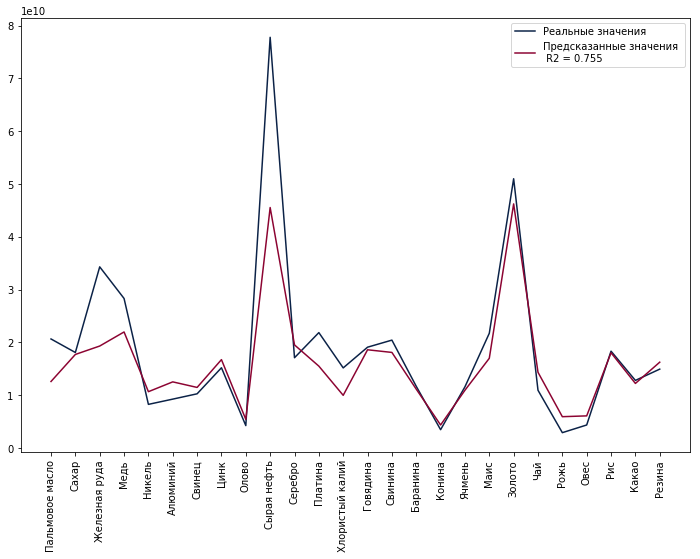

In [370]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(26))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new, color = "#0b2247")
plot2, = plt.plot(model_predicts_new, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
plt.legend([plot1, plot2], ["Реальные значения", "Предсказанные значения \n R2 = 0.755"])
plt.show()


In [328]:
r2_score(actuals_new, model_predicts_new)

0.7550735958620857

In [41]:

# data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
#  list data

model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
model3 = LinearRegression(fit_intercept = True)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model1.fit(X_train, ravel(y_train))
        model2.fit(X_train, ravel(y_train))
        model3.fit(X_train, ravel(y_train))#fit on train set, that contains all the obs except for item_
        preds1_ = model1.predict(X_test)
        preds2_ = model2.predict(X_test)
        preds3_ = model3.predict(X_test)
        averaging = (preds1_ + preds2_ + preds3_)/3
        preds.append(averaging)
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Пальмовое масло скор составляет 0.337
Для Сахар скор составляет 0.689
Для Железная руда скор составляет -0.667
Для Медь скор составляет 0.579
Для Никель скор составляет -0.513
Для Алюминий скор составляет -4.82
Для Свинец скор составляет 0.237
Для Цинк скор составляет 0.881
Для Олово скор составляет -34.3
Для Сырая нефть скор составляет -4.8
Для Серебро скор составляет 0.783
Для Платина скор составляет 0.0998
Для Хлористый калий скор составляет 0.609
Для Говядина скор составляет 0.621
Для Свинина скор составляет -0.336
Для Баранина скор составляет 0.683
Для Конина скор составляет -20.7
Для Ячмень скор составляет 0.861
Для Маис скор составляет -0.493
Для Золото скор составляет 0.402
Для Чай скор составляет -1.83
Для Рожь скор составляет -74.6
Для Овес скор составляет -25.1
Для Рис скор составляет 0.893
Для Какао скор составляет 0.955
Для Резина скор составляет 0.657
Средний скор для данных составляет -6.110065487833776


In [373]:

# data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
#  list data

model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 1, epsilon=0.01)
model3 = LinearRegression(fit_intercept = True)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model1.fit(X_train, ravel(y_train))
        model2.fit(X_train, ravel(y_train))
        model3.fit(X_train, ravel(y_train))#fit on train set, that contains all the obs except for item_
        preds1_ = model1.predict(X_test)
        preds2_ = model2.predict(X_test)
        preds3_ = model3.predict(X_test)
        averaging = (preds1_ + preds2_ + preds3_)/3
        preds.append(averaging)
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Пальмовое масло скор составляет 0.149
Для Сахар скор составляет 0.572
Для Железная руда скор составляет -0.661
Для Медь скор составляет 0.552
Для Никель скор составляет -0.912
Для Алюминий скор составляет -5.07
Для Свинец скор составляет 0.403
Для Цинк скор составляет 0.88
Для Олово скор составляет -39.7
Для Сырая нефть скор составляет -4.63
Для Серебро скор составляет 0.916
Для Платина скор составляет 0.304
Для Хлористый калий скор составляет 0.378
Для Говядина скор составляет 0.54
Для Свинина скор составляет -0.00576
Для Баранина скор составляет 0.468
Для Конина скор составляет -39.4
Для Ячмень скор составляет 0.909
Для Маис скор составляет -0.957
Для Золото скор составляет -0.165
Для Чай скор составляет -1.43
Для Рожь скор составляет -73.0
Для Овес скор составляет -23.8
Для Рис скор составляет 0.899
Для Какао скор составляет 0.953
Для Резина скор составляет 0.711
Средний скор для данных составляет -6.969028583918256


In [372]:

# data from https://docs.google.com/spreadsheets/d/1DKLCvav8efbkB8-6lJtDINDJwKWUcOg1yHUd6YLlRS0/edit#gid=1805190093
#  list data

model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model3 = LinearRegression(fit_intercept = True)
train = logged_data.copy(deep=True)
# X_train, y_train = train.loc[:, ["freq_sum_log10", "t"]], train.loc[:, ["sum_volume_log10"]]
# model__.fit(X_train, y_train)

score_list = []

for item in unique_items:
    test = logged_data[logged_data.loc[:, "name"] == item]
    X_test, y_test = test.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(test.loc[:, ["sum_volume_log10"]])
    preds = []
    for item_ in unique_items:      
        train_ = logged_data[logged_data.loc[:, "name"] != item_]
        X_train, y_train = train_.loc[:, ["freq_sum_log10", "t"]], pd.DataFrame(train_.loc[:, ["sum_volume_log10"]])
        model1.fit(X_train, ravel(y_train))
        model3.fit(X_train, ravel(y_train))#fit on train set, that contains all the obs except for item_
        preds1_ = model1.predict(X_test)
        preds3_ = model3.predict(X_test)
        averaging = (preds1_ + preds3_)/2
        preds.append(averaging)
        
    matrix__ = np.array(preds).transpose()
    df_pred = pd.DataFrame(matrix__)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    y_test_unlogged = np.power(y_test, 10)
    y_pred_unlogged = np.power(df_pred["prediction"], 10)
#     result_out2 = r2_score(y_test, df_pred["prediction"])
    result_out2 = r2_score(y_test_unlogged, y_pred_unlogged)
    score_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных составляет {}".format(np.mean(score_list)))
    


Для Пальмовое масло скор составляет 0.255
Для Сахар скор составляет 0.503
Для Железная руда скор составляет -0.439
Для Медь скор составляет 0.533
Для Никель скор составляет -0.429
Для Алюминий скор составляет -2.81
Для Свинец скор составляет -0.33
Для Цинк скор составляет 0.86
Для Олово скор составляет -25.9
Для Сырая нефть скор составляет -3.9
Для Серебро скор составляет 0.881
Для Платина скор составляет 0.388
Для Хлористый калий скор составляет 0.452
Для Говядина скор составляет 0.475
Для Свинина скор составляет 0.162
Для Баранина скор составляет 0.517
Для Конина скор составляет -27.1
Для Ячмень скор составляет 0.839
Для Маис скор составляет -0.571
Для Золото скор составляет 0.103
Для Чай скор составляет -0.363
Для Рожь скор составляет -48.8
Для Овес скор составляет -15.8
Для Рис скор составляет 0.847
Для Какао скор составляет 0.942
Для Резина скор составляет 0.639
Средний скор для данных составляет -4.53805921837175


In [166]:



model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
scaler = StandardScaler()
predictions_list = []

unique_items = logged_data.loc[:, "name"].unique()

X = logged_data.loc[:,["name","freq_sum_log10"]] #df
y = logged_data.loc[:,["name","sum_volume_log10"]] #df

X["freq_scaled"] = scaler.fit_transform(X.loc[:,['freq_sum_log10']])
y["vol_scaled"] = scaler.fit_transform(X.loc[:,['freq_sum_log10']])

# for item in unique_items:
    




In [158]:
X

,name,freq_sum_log10,freq_scaled
0,Пальмовое масло,1.176091,-2.242284
1,Пальмовое масло,0.698970,-2.745679
2,Пальмовое масло,1.255273,-2.158742
3,Пальмовое масло,1.230449,-2.184933
4,Пальмовое масло,1.505150,-1.895105
5,Пальмовое масло,1.505150,-1.895105
6,Пальмовое масло,1.361728,-2.046425
7,Пальмовое масло,1.361728,-2.046425
8,Пальмовое масло,1.681241,-1.709317
9,Пальмовое масло,1.826075,-1.556508


### Заготовка для работы с новыми данными и модель

In [217]:
logged_data

,name,sum_volume_log10,freq_sum_log10,t,freq_scaled,vol_scaled
0,Пальмовое масло,9.399995,1.176091,1,-2.242284,-0.719810
1,Пальмовое масло,9.496147,0.698970,2,-2.745679,-0.603059
2,Пальмовое масло,9.618810,1.255273,3,-2.158742,-0.454119
3,Пальмовое масло,9.670791,1.230449,4,-2.184933,-0.391002
4,Пальмовое масло,9.865340,1.505150,5,-1.895105,-0.154775
5,Пальмовое масло,9.985904,1.505150,6,-1.895105,-0.008383
6,Пальмовое масло,9.975128,1.361728,7,-2.046425,-0.021468
7,Пальмовое масло,10.016049,1.361728,8,-2.046425,0.028219
8,Пальмовое масло,10.060722,1.681241,9,-1.709317,0.082463
9,Пальмовое масло,10.015301,1.826075,10,-1.556508,0.027311


In [227]:
logged_data

,name,sum_volume_log10,freq_sum_log10,t
0,Пальмовое масло,9.399995,1.176091,1
1,Пальмовое масло,9.496147,0.698970,2
2,Пальмовое масло,9.618810,1.255273,3
3,Пальмовое масло,9.670791,1.230449,4
4,Пальмовое масло,9.865340,1.505150,5
5,Пальмовое масло,9.985904,1.505150,6
6,Пальмовое масло,9.975128,1.361728,7
7,Пальмовое масло,10.016049,1.361728,8
8,Пальмовое масло,10.060722,1.681241,9
9,Пальмовое масло,10.015301,1.826075,10


In [284]:
model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
scaler = StandardScaler()
mean_oneout_list = []
unique_items = logged_data.loc[:, "name"].unique()
predictions_all = []

scaled_data = logged_data.copy(deep=True)
scaled_data['freq_scaled'] = scaler.fit_transform(scaled_data.loc[:,["freq_sum_log10"]])
scaled_data['vol_scaled'] = scaler.fit_transform(scaled_data.loc[:,["sum_volume_log10"]])

for item in unique_items:
    logged_data = []
    logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]
    predictions_list = []
#     data_extended = []
#     test = logged_data[logged_data.loc[:, "name"] == item] 
#     data_extended = logged_data.copy(deep=True)
#     # above imitate test data series input (! must be of len 29 and logged10)
#     i = 0
#     while i < 29:
#         data_extended = data_extended.append({"name":item, "sum_volume_log10":"", "freq_sum_log10":test.freq_sum_log10[i], "t":""},ignore_index=True)
#         i += 1
    
#     # in data extended we imitate the situation then the new data (test) comes as input
#     # here the data we append is in our train data, but the sense is in imitting the performance of model
#     # on prediction task - no matter we know the real otput or not
    
#     # we need to scale this data according to the our data scale measures, so that's the reason of using apply
    
#     data_extended['X_scaled'] = scaler.fit_transform(data_extended.loc[:,['freq_sum_log10']])
#     #scaled X
    
#     X_test_data = data_extended[data_extended.loc[:, "name"] == item]
#     X_test = X_test_data.loc[754:, ["X_scaled"]]
#     X_test_ext = X_test_data.loc[754:, ["t", "X_scaled"]]
    
    
    X_test_data = scaled_data[scaled_data.loc[:, "name"] == item]
    X_test = X_test_data.loc[:, ["freq_scaled"]]
    
    for item_ in unique_items:
        train = scaled_data[scaled_data.loc[:, "name"] != item_]
        X_train, Y_train = scaler.fit_transform(train.loc[:, ["freq_scaled"]]), scaler.fit_transform(train.loc[:, ["vol_scaled"]])
        model1.fit(X_train, ravel(Y_train))
        model2.fit(X_train, ravel(Y_train))
        prediction_1 = model1.predict(X_test)
        prediction_2 = model2.predict(X_test)
        average_prediction = (prediction_1 + prediction_2) /  2
        predictions_list.append(average_prediction)
    matrix_t = np.array(predictions_list).transpose()
    df_pred = pd.DataFrame(matrix_t)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    predictions_all.append(df_pred["prediction"])
    
    scaled_data2 = scaled_data.loc[:,["name", "vol_scaled", "sum_volume_log10"]]
    
    for i in range(29):
        scaled_data2 = scaled_data2.append({"name":item, "vol_scaled":df_pred["prediction"][i]},ignore_index=True)
    
    scaled_data2['descaled_vol'] = scaler.inverse_transform(scaled_data2.loc[:,["vol_scaled"]])
    Y_descaled = scaled_data2[scaled_data2.loc[:,"name"] == item]
    Y_preds_descaled = scaled_data2.loc[754:, "descaled_vol"]
    print(ks_2samp(scaled_data2.vol_scaled, Y_preds_descaled))
#     data_extended = data_extended.loc[:754, ['name', 'sum_volume_log10', 'freq_sum_log10', 't']]
#     print(Y_preds_descaled)
#     print(df_pred["prediction"])
#     result_out2 = r2_score(Y_test_, df_pred["prediction"])
#     mean_oneout_list.append(result_out2)
#     print("Для {} скор составляет {:.3}".format(item_, result_out2))
# print("Средний скор для данных соsставляет {}".format(np.mean(mean_oneout_list)))
    
#     X_test = X_scaled[X_scaled.loc[:, "name"] == item]
# print(scaled_data)

Ks_2sampResult(statistic=0.46360153256704983, pvalue=6.293359429536473e-06)
Ks_2sampResult(statistic=0.3486590038314177, pvalue=0.0015452418148480544)
Ks_2sampResult(statistic=0.3754789272030651, pvalue=0.0004918216709846166)
Ks_2sampResult(statistic=0.25798212005108556, pvalue=0.03955619164507139)
Ks_2sampResult(statistic=0.23371647509578541, pvalue=0.0799162909515562)
Ks_2sampResult(statistic=0.24776500638569604, pvalue=0.053640459263646544)
Ks_2sampResult(statistic=0.45721583652618136, pvalue=8.90047011033433e-06)
Ks_2sampResult(statistic=0.2860791826309068, pvalue=0.016064984002154472)
Ks_2sampResult(statistic=0.3116219667943806, pvalue=0.006531971324957483)
Ks_2sampResult(statistic=0.25415070242656446, pvalue=0.044406398970122704)
Ks_2sampResult(statistic=0.39846743295019155, pvalue=0.00017231898280083765)
Ks_2sampResult(statistic=0.28607918263090676, pvalue=0.016064984002154486)
Ks_2sampResult(statistic=0.5925925925925926, pvalue=2.0470499011686447e-09)
Ks_2sampResult(statistic=0

In [292]:
mean_decode = logged_data.sum_volume_log10.mean()
sd_decode = logged_data.sum_volume_log10.std()

model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
scaler = StandardScaler()
mean_oneout_list = []
unique_items = logged_data.loc[:, "name"].unique()
predictions_all = []

scaled_data = logged_data.copy(deep=True)
scaled_data['freq_scaled'] = scaler.fit_transform(scaled_data.loc[:,["freq_sum_log10"]])
scaled_data['vol_scaled'] = scaler.fit_transform(scaled_data.loc[:,["sum_volume_log10"]])

for item in unique_items:
    logged_data = []
    logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]
    predictions_list = []

    X_test_data = scaled_data[scaled_data.loc[:, "name"] == item]
    X_test = X_test_data.loc[:, ["freq_scaled"]]
    Y_test_ = X_test_data.loc[:, "sum_volume_log10"]
    
    for item_ in unique_items:
        train = scaled_data[scaled_data.loc[:, "name"] != item_]
        X_train, Y_train = scaler.fit_transform(train.loc[:, ["freq_scaled"]]), scaler.fit_transform(train.loc[:, ["vol_scaled"]])
        model1.fit(X_train, ravel(Y_train))
        model2.fit(X_train, ravel(Y_train))
        prediction_1 = model1.predict(X_test)
        prediction_2 = model2.predict(X_test)
        average_prediction = (prediction_1 + prediction_2) /  2
        predictions_list.append(average_prediction)
    matrix_t = np.array(predictions_list).transpose()
    df_pred = pd.DataFrame(matrix_t)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    predictions_all.append(df_pred["prediction"])
    y_pred = df_pred[["prediction"]]
    y_pred['norm'] = y_pred.prediction*sd_decode + mean_decode
    
    scaled_data2 = scaled_data.loc[:,["name", "vol_scaled", "sum_volume_log10"]]
    
    for i in range(29):
        scaled_data2 = scaled_data2.append({"name":item, "vol_scaled":df_pred["prediction"][i]},ignore_index=True)
    
    scaled_data2['descaled_vol'] = scaler.inverse_transform(scaled_data2.loc[:,["vol_scaled"]])
    Y_descaled = scaled_data2[scaled_data2.loc[:,"name"] == item]
#     Y_preds_descaled = scaled_data2.loc[754:, "descaled_vol"]
    #Distribution test:
#     print(ks_2samp(scaled_data2.vol_scaled, Y_preds_descaled))

    result_out2 = r2_score(Y_test_, y_pred.norm)
    mean_oneout_list.append(result_out2)
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных соsставляет {}".format(np.mean(mean_oneout_list)))
    
#     X_test = X_scaled[X_scaled.loc[:, "name"] == item]
# print(scaled_data)

Для Резина скор составляет -0.888
Для Резина скор составляет 0.399
Для Резина скор составляет -2.46
Для Резина скор составляет 0.554
Для Резина скор составляет -1.26
Для Резина скор составляет -4.68
Для Резина скор составляет -3.56
Для Резина скор составляет 0.619
Для Резина скор составляет -21.2
Для Резина скор составляет -18.3
Для Резина скор составляет 0.405
Для Резина скор составляет 0.105
Для Резина скор составляет -0.99
Для Резина скор составляет 0.496
Для Резина скор составляет -0.783
Для Резина скор составляет -0.00213
Для Резина скор составляет -13.5
Для Резина скор составляет 0.351
Для Резина скор составляет -4.95
Для Резина скор составляет -0.801
Для Резина скор составляет -2.0
Для Резина скор составляет -26.3
Для Резина скор составляет -11.1
Для Резина скор составляет 0.742
Для Резина скор составляет 0.561
Для Резина скор составляет 0.727
Средний скор для данных соsставляет -4.152142069947107


Unlogged


In [ ]:
y_test_unlogged = np.power(y_test, 10)

In [308]:
mean_decode = logged_data.sum_volume_log10.mean()
sd_decode = logged_data.sum_volume_log10.std()

model1 = RandomForestRegressor(n_estimators=200, random_state=12)
model2 = SVR(kernel='rbf', verbose=False, C = 100, epsilon=0.01)
scaler = StandardScaler()
mean_oneout_list = []
unique_items = logged_data.loc[:, "name"].unique()
predictions_all = []

scaled_data = logged_data.copy(deep=True)
scaled_data['freq_scaled'] = scaler.fit_transform(scaled_data.loc[:,["freq_sum_log10"]])
scaled_data['vol_scaled'] = scaler.fit_transform(scaled_data.loc[:,["sum_volume_log10"]])

table_names_ = []
actuals_ = []
model_predicts_ = []

for item in unique_items:
    logged_data = []
    logged_data = data[['name', 'sum_volume_log10', 'freq_sum_log10', 't']]
    predictions_list = []

    X_test_data = scaled_data[scaled_data.loc[:, "name"] == item]
    X_test = X_test_data.loc[:, ["freq_scaled"]]
    Y_test_ = X_test_data.loc[:, "sum_volume_log10"]
    Y_test_ = np.power(Y_test_, 10)
    
    for item_ in unique_items:
        train = scaled_data[scaled_data.loc[:, "name"] != item_]
        X_train, Y_train = scaler.fit_transform(train.loc[:, ["freq_scaled"]]), scaler.fit_transform(train.loc[:, ["vol_scaled"]])
        model1.fit(X_train, ravel(Y_train))
        model2.fit(X_train, ravel(Y_train))
        prediction_1 = model1.predict(X_test)
        prediction_2 = model2.predict(X_test)
        average_prediction = (prediction_1 + prediction_2) /  2
        predictions_list.append(average_prediction)
    matrix_t = np.array(predictions_list).transpose()
    df_pred = pd.DataFrame(matrix_t)
    df_pred["prediction"] = df_pred.mean(axis = 1)
    predictions_all.append(df_pred["prediction"])
    y_pred = df_pred[["prediction"]]
    y_pred['norm'] = y_pred.prediction*sd_decode + mean_decode
    
    Y_pred_unlogged = np.power(y_pred.norm, 10)
    
    scaled_data2 = scaled_data.loc[:,["name", "vol_scaled", "sum_volume_log10"]]
    
    for i in range(29):
        scaled_data2 = scaled_data2.append({"name":item, "vol_scaled":df_pred["prediction"][i]},ignore_index=True)
    
    scaled_data2['descaled_vol'] = scaler.inverse_transform(scaled_data2.loc[:,["vol_scaled"]])
    Y_descaled = scaled_data2[scaled_data2.loc[:,"name"] == item]
#     Y_preds_descaled = scaled_data2.loc[754:, "descaled_vol"]
    #Distribution test:
#     print(ks_2samp(scaled_data2.vol_scaled, Y_preds_descaled))

    result_out2 = r2_score(Y_test_, Y_pred_unlogged)
    
    
    # get last values that represent 2018
    table_names.append(item)
    model_predicts_.append(Y_pred_unlogged[28])
    actuals_.append(list(Y_test_))
    
    mean_oneout_list.append(result_out2)
    
    print("Для {} скор составляет {:.3}".format(item, result_out2))
print("Средний скор для данных соsставляет {}".format(np.mean(mean_oneout_list)))
    
#     X_test = X_scaled[X_scaled.loc[:, "name"] == item]
# print(scaled_data)

Для Пальмовое масло скор составляет -0.879
Для Сахар скор составляет 0.391
Для Железная руда скор составляет -1.45
Для Медь скор составляет 0.391
Для Никель скор составляет -2.8
Для Алюминий скор составляет -12.2
Для Свинец скор составляет -6.84
Для Цинк скор составляет 0.648
Для Олово скор составляет -77.8
Для Сырая нефть скор составляет -5.81
Для Серебро скор составляет 0.459
Для Платина скор составляет -0.0548
Для Хлористый калий скор составляет -0.901
Для Говядина скор составляет 0.647
Для Свинина скор составляет -0.467
Для Баранина скор составляет -0.231
Для Конина скор составляет -46.4
Для Ячмень скор составляет 0.394
Для Маис скор составляет -3.16
Для Золото скор составляет -0.681
Для Чай скор составляет -4.58
Для Рожь скор составляет -1.05e+02
Для Овес скор составляет -29.8
Для Рис скор составляет 0.777
Для Какао скор составляет 0.575
Для Резина скор составляет 0.691
Средний скор для данных соsставляет -11.316555359344987


In [310]:
actuals_new2 = []
for i in range(len(actuals_)):
    actuals_new2.append(actuals_[i][-1])

In [312]:
r2_score(actuals_new2, model_predicts_)

0.03663716039830189

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
a = list(range(26))

plt.figure(figsize=(12, 8))
plot1, = plt.plot(actuals_new2, color = "#0b2247")
plot2, = plt.plot(model_predicts_, color = "#8c0432") #520821
plt.xticks(a, unique_items, rotation='vertical')
plt.legend([plot1, plot2], ["Реальные значения", "Предсказанные значения \n R2 = 0.755"])
plt.show()


In [266]:
plot_preds = []
for i in range(len(predictions_all)):
    for i_ in range(29):
        plot_preds.append(predictions_all[i][i_])

In [265]:
len(predictions_all[25])

29

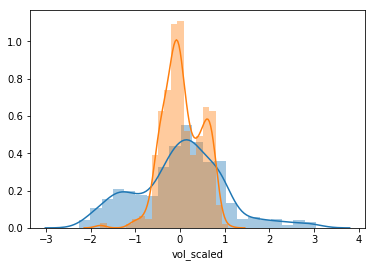

In [281]:
import seaborn as sns
sns.distplot(scaled_data2.vol_scaled)
# sns.distplot(scaled_data2.descaled_vol, color = "r", hist_kws=dict(alpha=0.2))
sns.distplot(plot_preds)

In [282]:
from scipy.stats import ks_2samp
ks_2samp(scaled_data2.vol_scaled, plot_preds)
# not identical due to Komogorov-Smirnov test

Ks_2sampResult(statistic=0.2848020434227331, pvalue=0.016770468767200754)

 Under the null hypothesis the two distributions are identical